In [49]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import requests
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [50]:
url1 = 'https://raw.githubusercontent.com/mandy941/Chinese-Product-in-US-Market/main/SNACK%20MARKET/Analysis%20Data/dried%20fruit/Yami%20Dried%20Fruit.csv'
url2 = 'https://raw.githubusercontent.com/mandy941/Chinese-Product-in-US-Market/main/SNACK%20MARKET/Analysis%20Data/dried%20fruit/Dried%20Fruits%20Data-ScrapeStorm.csv'

yami = pd.read_csv(url1, encoding='latin1')
yami.head()

,Product_Name,Brand,Reviews,Price,Option,Origin,Rate,Platform,Category,Sold_Weekly,Sold_Monthly,Weekly_Revenue
0,Colorful Dried Fruits and Vegetables 50g,bestore,1,2.89,No,Mainland China,5.0,Yami,Dried Fruit,200,800,578.0
1,Dried Plum Slice 14g,i factory,229,2.49,2 Options,Japan,4.8,Yami,Dried Fruit,400,1600,996.0
2,Freeze Dried Strawberry 20g,big green,178,1.99,5 Options,Mainland China,4.6,Yami,Dried Fruit,300,1200,597.0
3,Yellow Peach Dried Fruits 98g,bestore,0,6.99,No,Mainland China,0.0,Yami,Dried Fruit,200,800,1398.0
4,Fragrant Dried Olives 70g,yifen,0,2.19,No,Mainland China,0.0,Yami,Dried Fruit,400,1600,876.0


In [51]:
weee = pd.read_csv(url2, encoding='latin1')
weee.head()

,Product_Name,Price,Sold_Weekly,Origin,Brand,Reviews,Sold_Monthly,Weekly_Revenue,Platform,Category,Option,Rate
0,ZhengDa Shredded Dry Fig 8 g,0.79,1000,Mainland China,ZhengDa,89,4000,790.0,Weee,Dried Fruit,Unclear,Unclear
1,Haw Flakes Hawthorn Candy 330 g,3.19,500,Mainland China,Unclear,91,2000,1595.0,Weee,Dried Fruit,Unclear,Unclear
2,Sugar-Coated Hawthorn In Stick 25 g,1.69,1000,Mainland China,Unclear,39,4000,1690.0,Weee,Dried Fruit,Unclear,Unclear
3,Yida Hawthorn Chips 180 g,1.99,1000,Mainland China,Unclear,98,4000,1990.0,Weee,Dried Fruit,Unclear,Unclear
4,Lyfen Preserved Plum Flakes 90 g,3.79,800,Mainland China,LYFEN,157,3200,3032.0,Weee,Dried Fruit,Unclear,Unclear


# Combine three tables together

In [52]:
df = pd.concat([yami,weee])
df.head()

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Brand,Category,Option,Origin,Platform,Price,Product_Name,Rate,Reviews,Sold_Monthly,Sold_Weekly,Weekly_Revenue
0,bestore,Dried Fruit,No,Mainland China,Yami,2.89,Colorful Dried Fruits and Vegetables 50g,5,1,800,200,578.0
1,i factory,Dried Fruit,2 Options,Japan,Yami,2.49,Dried Plum Slice 14g,4.8,229,1600,400,996.0
2,big green,Dried Fruit,5 Options,Mainland China,Yami,1.99,Freeze Dried Strawberry 20g,4.6,178,1200,300,597.0
3,bestore,Dried Fruit,No,Mainland China,Yami,6.99,Yellow Peach Dried Fruits 98g,0,0,800,200,1398.0
4,yifen,Dried Fruit,No,Mainland China,Yami,2.19,Fragrant Dried Olives 70g,0,0,1600,400,876.0


In [53]:
print(df.shape)
print(list(df.columns))

(1668, 12)
['Brand', 'Category', 'Option', 'Origin', 'Platform', 'Price', 'Product_Name', 'Rate', 'Reviews', 'Sold_Monthly', 'Sold_Weekly', 'Weekly_Revenue']


# Analysis

In [54]:
df.describe()

,Price,Reviews,Sold_Monthly,Sold_Weekly,Weekly_Revenue
count,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000
mean,12.811259,18.582734,1336.045564,334.011391,4904.176553
std,29.900308,48.155402,590.852426,147.713107,18755.657971
min,0.490000,0.000000,0.000000,0.000000,0.000000
25%,2.990000,0.000000,1200.000000,300.000000,796.000000
50%,5.290000,4.000000,1600.000000,400.000000,1756.000000
75%,10.990000,16.000000,1600.000000,400.000000,3996.000000
max,650.000000,742.000000,4000.000000,1000.000000,650000.000000


In [55]:
df.sum(axis = 0)

Brand             bestorei factorybig greenbestoreyifensiam's ro...
Category          Dried FruitDried FruitDried FruitDried FruitDr...
Option            No2 Options5 OptionsNoNoNoNoNoNoNoNoNoNo7 Opti...
Origin            Mainland ChinaJapanMainland ChinaMainland Chin...
Platform          YamiYamiYamiYamiYamiYamiYamiYamiYamiYamiYamiYa...
Price                                                       21369.2
Product_Name      Colorful Dried Fruits and Vegetables 50gDried ...
Reviews                                                       30996
Sold_Monthly                                                2228524
Sold_Weekly                                                  557131
Weekly_Revenue                                          8.18017e+06
dtype: object

In [56]:
df['Origin'] = df['Origin'].replace('ROYAL FAMILY','Unclear')

# The Most Popular Origin (Highest Weekly Revenue /Num of Product)


In [57]:
origin = df.groupby(['Origin'])['Product_Name'].count()
origin

Origin
Canada              8
Hong Kong          20
Indonesia           6
Japan              54
Korea              36
Macao               5
Mainland China    963
Malaysia            4
Mexico              3
Philippine          1
Philippines         2
Singapore           1
Tailand             1
Taiwan            169
Thailand           22
Unclear            34
United States     322
Vietnam            17
Name: Product_Name, dtype: int64

In [58]:
pop_origin = df.groupby(['Origin'])['Weekly_Revenue'].sum()/df.groupby(['Origin'])['Product_Name'].count()
pop_origin

Origin
Canada            49045.500000
Hong Kong          1939.262500
Indonesia          1306.583333
Japan              4105.023148
Korea              2367.340278
Macao              2468.000000
Mainland China     2068.595275
Malaysia          17203.500000
Mexico                0.000000
Philippine         1596.000000
Philippines         518.000000
Singapore            97.250000
Tailand              62.250000
Taiwan             2141.470355
Thailand           1468.318182
Unclear            3013.852941
United States     15049.410714
Vietnam             922.750000
dtype: float64

In [59]:
pop_origin.sort_values(ascending=False).head(10)

Origin
Canada            49045.500000
Malaysia          17203.500000
United States     15049.410714
Japan              4105.023148
Unclear            3013.852941
Macao              2468.000000
Korea              2367.340278
Taiwan             2141.470355
Mainland China     2068.595275
Hong Kong          1939.262500
dtype: float64

# The most popular brand by unit selling


In [60]:
pop_brand = df.groupby(['Brand'])['Weekly_Revenue'].sum()/df.groupby(['Brand'])['Product_Name'].count()
pop_brand

Brand
Big Green          412.875000
CHUZA                0.000000
Farmers Grange    1661.666667
Koushuiwa          833.750000
LLM               1197.000000
                     ...     
zhongjianghong    1756.000000
zhongqinhui        596.000000
zuming             756.000000
zxj               2196.000000
zyf               1936.000000
Length: 403, dtype: float64

In [61]:
pop_brand.sort_values(ascending=False).head(5)

Brand
chungchou city          110097.916667
peace pavilion          103248.000000
huifeng                  96533.333333
parkland                 72000.000000
ontario pure ginseng     32032.000000
dtype: float64

# The popular brand by revenue

In [62]:
pop_brand2 = df.groupby(['Brand'])['Weekly_Revenue'].sum()
pop_brand2

Brand
Big Green         3303.0
CHUZA                0.0
Farmers Grange    4985.0
Koushuiwa         1667.5
LLM               2394.0
                   ...  
zhongjianghong    1756.0
zhongqinhui        596.0
zuming            6048.0
zxj               4392.0
zyf               3872.0
Name: Weekly_Revenue, Length: 403, dtype: float64

In [63]:
pop_brand2.sort_values(ascending=False).head(5)

Brand
xlseafood          1800136.0
mccabe              953672.0
chungchou city      660587.5
president brand     474120.0
huifeng             289600.0
Name: Weekly_Revenue, dtype: float64

# The Main Import Origin

In [64]:
main_origin = df.groupby(['Origin'])['Product_Name'].count()
main_origin

Origin
Canada              8
Hong Kong          20
Indonesia           6
Japan              54
Korea              36
Macao               5
Mainland China    963
Malaysia            4
Mexico              3
Philippine          1
Philippines         2
Singapore           1
Tailand             1
Taiwan            169
Thailand           22
Unclear            34
United States     322
Vietnam            17
Name: Product_Name, dtype: int64

In [65]:
main_origin.sort_values(ascending=False).head(5)

Origin
Mainland China    963
United States     322
Taiwan            169
Japan              54
Korea              36
Name: Product_Name, dtype: int64

# The most value import Origin

In [66]:
value_origin = df.groupby(['Origin'])['Weekly_Revenue'].sum()
value_origin

Origin
Canada             392364.00
Hong Kong           38785.25
Indonesia            7839.50
Japan              221671.25
Korea               85224.25
Macao               12340.00
Mainland China    1992057.25
Malaysia            68814.00
Mexico                  0.00
Philippine           1596.00
Philippines          1036.00
Singapore              97.25
Tailand                62.25
Taiwan             361908.49
Thailand            32303.00
Unclear            102471.00
United States     4845910.25
Vietnam             15686.75
Name: Weekly_Revenue, dtype: float64

In [67]:
value_origin.sort_values(ascending=False).head(5)

Origin
United States     4845910.25
Mainland China    1992057.25
Canada             392364.00
Taiwan             361908.49
Japan              221671.25
Name: Weekly_Revenue, dtype: float64

# platform offers choice - most


In [68]:
choice = df.groupby(['Platform'])['Product_Name'].count()
choice

Platform
Weee     171
Yami    1497
Name: Product_Name, dtype: int64

In [69]:
value_choice =  df.groupby(['Platform'])['Weekly_Revenue'].sum()/df.groupby(['Platform'])['Product_Name'].count()
value_choice

Platform
Weee     644.413684
Yami    5390.762692
dtype: float64

## The Number of profuct by origin

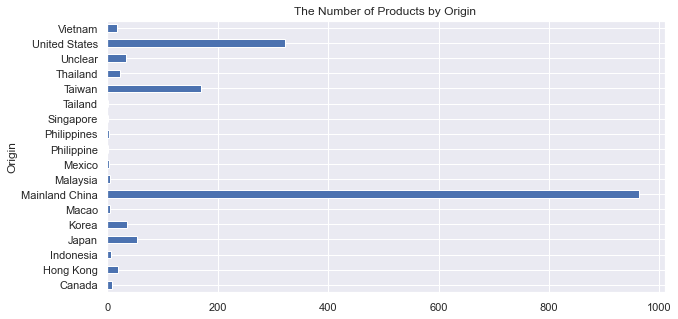

In [70]:
count_origin = df.groupby([df['Origin']])['Product_Name'].count()
count_origin.plot(kind='barh',figsize=(10,5),legend=None, title="The Number of Products by Origin ")

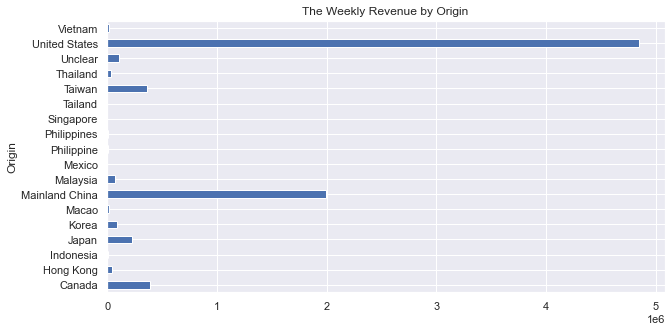

In [71]:
sum_revenue = df.groupby([df['Origin']])['Weekly_Revenue'].sum()
sum_revenue.plot(kind='barh',figsize=(10,5),legend=None, title="The Weekly Revenue by Origin ")

In [29]:
count_platform = df.groupby(['Platform'])['Product_Name'].count()
count_platform

Platform
Weee     171
Yami    1497
Name: Product_Name, dtype: int64

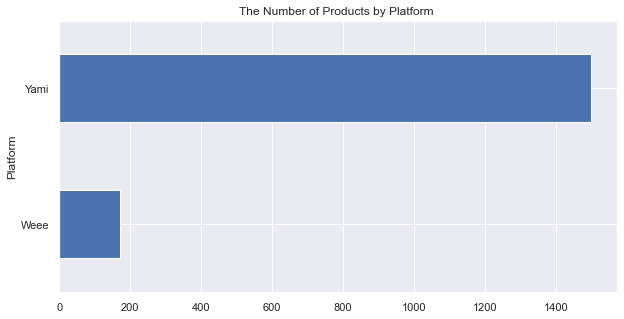

In [30]:
platform = df.groupby([df['Platform']])['Brand'].count()
platform.plot(kind='barh',figsize=(10,5),legend=None, title="The Number of Products by Platform ")

Text(0.5, 1.0, 'Figure 5: Correlations')

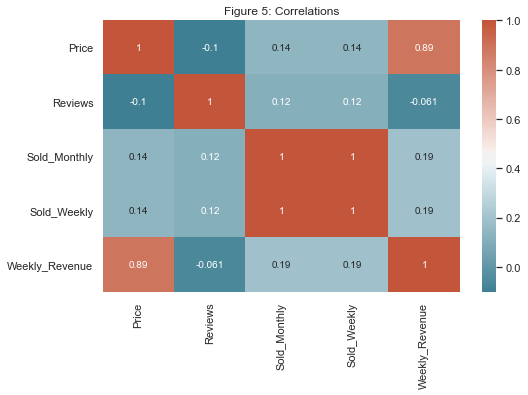

In [31]:
# Finding the correlation bewteen the Features.
plt.figure(figsize=(8,5))

corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Figure 5: Correlations')

## Origin vs Platform


Text(0.5, 1.0, 'Platform vs. Origin')

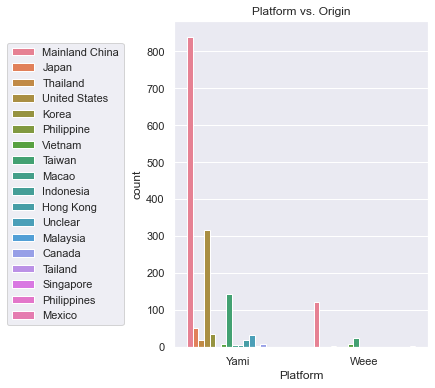

In [32]:
# Origin vs Platform

plt.rcParams['figure.figsize'] = (10, 6)

# compare the year with Origin with Platform
plt.subplot(121)
sns.countplot(x='Platform',hue= 'Origin', data=df, palette = 'husl')
plt.legend(bbox_to_anchor=(-0.2, 0.5), loc='right', borderaxespad=0)
plt.title('Platform vs. Origin')

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


Origin,Canada,Hong Kong,Indonesia,Japan,Korea,Macao,Mainland China,Malaysia,Mexico,Philippine,Philippines,Singapore,Tailand,Taiwan,Thailand,Unclear,United States,Vietnam
Platform,,,,,,,,,,,,,,,,,,
Weee,0,1,1,2,0,0,123,0,3,0,2,0,0,25,2,0,4,8
Yami,8,19,5,52,36,5,840,4,0,1,0,1,1,144,20,34,318,9


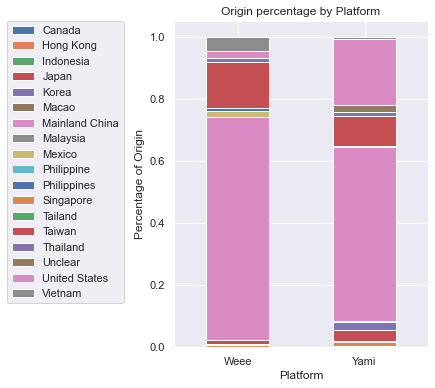

In [33]:
# check the Origin percentage of Platform
plt.rcParams['figure.figsize'] = (10, 6)
ax= plt.subplot(122)
c2_c = pd.crosstab(df.Platform, df.Origin)
c2_c.div(c2_c .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Origin percentage by Platform')
plt.legend(bbox_to_anchor=(-0.2, 1), loc='left', borderaxespad=0)
plt.xlabel('Platform')
plt.xticks(rotation=0)
plt.ylabel('Percentage of Origin')

c2_c

## Origin Vs Sold_Weekly_Group

In [34]:
df['Sold_Weekly_Group'] = pd.cut(x = df['Sold_Weekly'], 
                                   bins = [0,50,100,200,300,400,500,1000,2000,10000],
                                   labels = ['Less than 50','50+','100+','200+','300+','400+','500+','1000+','2000+'])
df.head()

,Brand,Category,Option,Origin,Platform,Price,Product_Name,Rate,Reviews,Sold_Monthly,Sold_Weekly,Weekly_Revenue,Sold_Weekly_Group
0,bestore,Dried Fruit,No,Mainland China,Yami,2.89,Colorful Dried Fruits and Vegetables 50g,5,1,800,200,578.0,100+
1,i factory,Dried Fruit,2 Options,Japan,Yami,2.49,Dried Plum Slice 14g,4.8,229,1600,400,996.0,300+
2,big green,Dried Fruit,5 Options,Mainland China,Yami,1.99,Freeze Dried Strawberry 20g,4.6,178,1200,300,597.0,200+
3,bestore,Dried Fruit,No,Mainland China,Yami,6.99,Yellow Peach Dried Fruits 98g,0,0,800,200,1398.0,100+
4,yifen,Dried Fruit,No,Mainland China,Yami,2.19,Fragrant Dried Olives 70g,0,0,1600,400,876.0,300+


Text(0.5, 1.0, 'Sold_Weekly_Group vs. Origin')

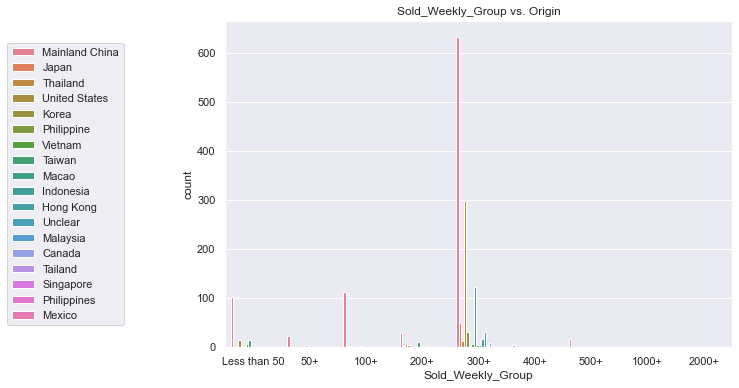

In [35]:
# origin vs sold weekly group

plt.rcParams['figure.figsize'] = (20, 6)

# compare the year with Origin with Platform
plt.subplot(121)
sns.countplot(x='Sold_Weekly_Group',hue= 'Origin', data=df, palette = 'husl')
plt.legend(bbox_to_anchor=(-0.2, 0.5), loc='right', borderaxespad=0)
plt.title('Sold_Weekly_Group vs. Origin')

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


Sold_Weekly_Group,Less than 50,50+,100+,200+,300+,400+,500+
Origin,,,,,,,
Canada,0,0,0,0,8,0,0
Hong Kong,1,0,1,1,17,0,0
Indonesia,1,0,0,0,5,0,0
Japan,1,0,0,2,50,0,0
Korea,3,0,1,0,32,0,0
Macao,0,0,0,0,5,0,0
Mainland China,103,23,113,29,633,4,17
Malaysia,1,0,1,0,2,0,0
Philippine,0,0,0,0,1,0,0


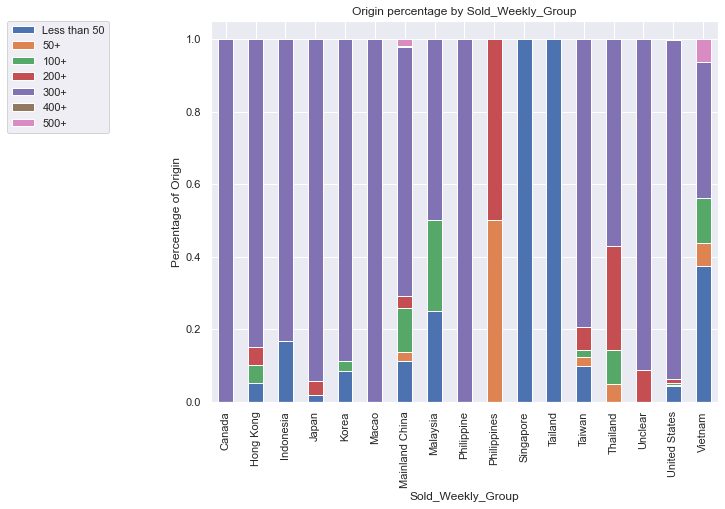

In [44]:
# origin vs sold weekly group

plt.rcParams['figure.figsize'] = (20, 7)
# check the Origin percentage of Platform
ax= plt.subplot(122)
c2_c = pd.crosstab(df.Origin,df.Sold_Weekly_Group)
c2_c.div(c2_c .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Origin percentage by Sold_Weekly_Group')
plt.legend(bbox_to_anchor=(-0.2, 1), loc='left', borderaxespad=0)
plt.xlabel('Sold_Weekly_Group')
plt.xticks(rotation=90)
plt.ylabel('Percentage of Origin')

c2_c

## Price_Group Vs Origin

In [37]:
df['Price_Group'] = pd.cut(x = df['Price'], 
                                   bins = [0,2,4,6,8,10,12,14,16,10000],
                                   labels = ['Less than 2','2+','4+','6+','8+','10+','12+','14+','16+'])
df.head()

,Brand,Category,Option,Origin,Platform,Price,Product_Name,Rate,Reviews,Sold_Monthly,Sold_Weekly,Weekly_Revenue,Sold_Weekly_Group,Price_Group
0,bestore,Dried Fruit,No,Mainland China,Yami,2.89,Colorful Dried Fruits and Vegetables 50g,5,1,800,200,578.0,100+,2+
1,i factory,Dried Fruit,2 Options,Japan,Yami,2.49,Dried Plum Slice 14g,4.8,229,1600,400,996.0,300+,2+
2,big green,Dried Fruit,5 Options,Mainland China,Yami,1.99,Freeze Dried Strawberry 20g,4.6,178,1200,300,597.0,200+,Less than 2
3,bestore,Dried Fruit,No,Mainland China,Yami,6.99,Yellow Peach Dried Fruits 98g,0,0,800,200,1398.0,100+,6+
4,yifen,Dried Fruit,No,Mainland China,Yami,2.19,Fragrant Dried Olives 70g,0,0,1600,400,876.0,300+,2+


Text(0.5, 1.0, 'Price_Group vs. Origin')

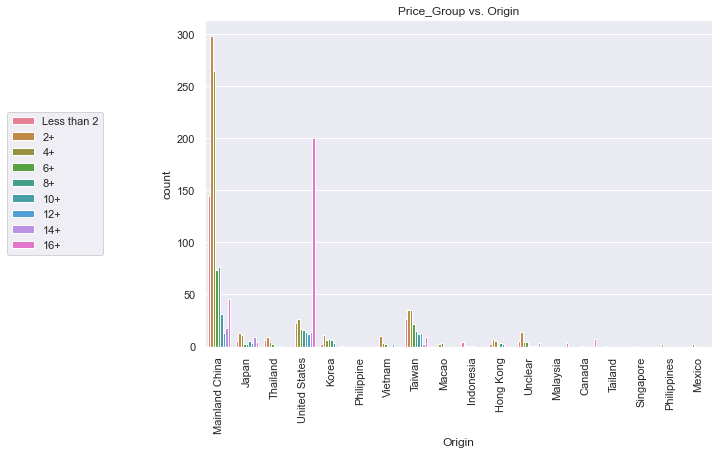

In [38]:
# origin vs Price group

plt.rcParams['figure.figsize'] = (20, 6)

# compare the year with Origin with price group
plt.subplot(121)
sns.countplot(x='Origin',hue= 'Price_Group', data=df, palette = 'husl')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(-0.2, 0.5), loc='right', borderaxespad=0)
plt.title('Price_Group vs. Origin')

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


Price_Group,Less than 2,2+,4+,6+,8+,10+,12+,14+,16+
Origin,,,,,,,,,
Canada,0,0,0,1,0,0,0,0,4
Denmark,0,1,0,0,0,0,0,0,0
German,0,0,0,0,0,0,0,0,1
Hong Kong,2,20,10,1,4,4,0,0,1
Indonesia,3,2,0,0,1,0,0,0,0
Japan,5,29,25,10,3,8,4,9,8
Korea,9,36,25,16,12,4,0,2,6
Macao,0,1,2,3,0,0,0,0,0
Mainland China,189,396,285,97,94,40,14,17,100


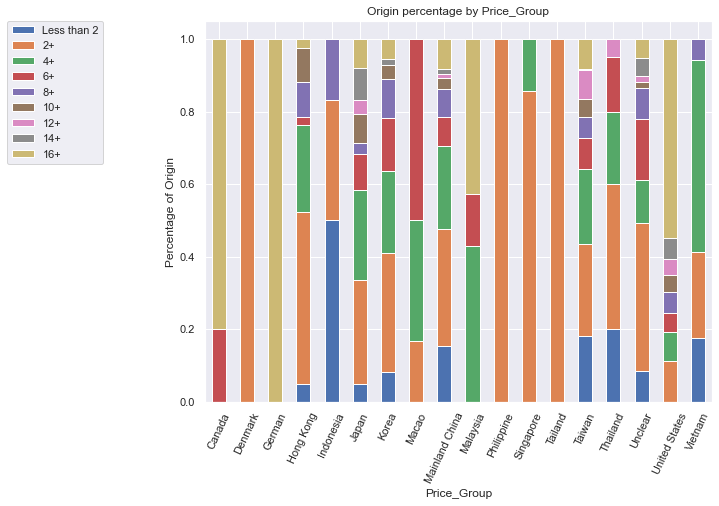

In [43]:
# origin vs sold weekly group

plt.rcParams['figure.figsize'] = (20, 7)

# check the Origin percentage of Platform
ax= plt.subplot(122)
c2_c = pd.crosstab( dbc.Origin, dbc.Price_Group)
c2_c.div(c2_c .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Origin percentage by Price_Group')
plt.legend(bbox_to_anchor=(-0.2, 1), loc='left', borderaxespad=0)
plt.xlabel('Price_Group')
plt.xticks(rotation=65)
plt.ylabel('Percentage of Origin')

c2_c

## Price_Group Vs Sold_Weekly_Group


C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


Sold_Weekly_Group,Less than 50,50+,100+,200+,300+,400+,500+
Price_Group,,,,,,,
Less than 2,11,3,3,8,160,1,6
2+,52,15,26,24,284,1,11
4+,51,7,33,15,232,0,1
6+,16,5,16,3,85,1,0
8+,10,1,25,2,73,0,0
10+,2,0,13,2,49,0,0
12+,3,0,2,2,34,0,0
14+,1,0,0,0,43,0,0
16+,1,0,6,0,263,1,1


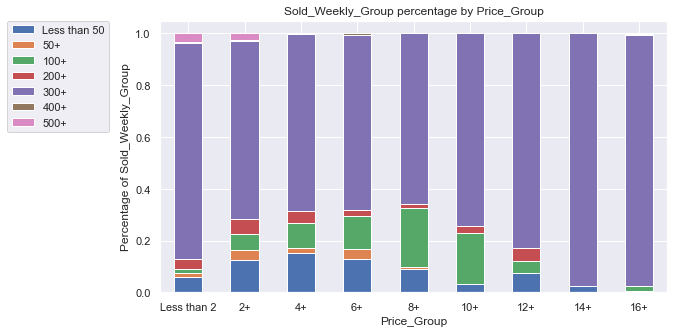

In [39]:
plt.rcParams['figure.figsize'] = (20, 5)

# check the Price_Group percentage of Sold_Weekly_Group
ax= plt.subplot(122)
c2_c = pd.crosstab(df.Price_Group, df.Sold_Weekly_Group)
c2_c.div(c2_c .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Sold_Weekly_Group percentage by Price_Group')
plt.legend(bbox_to_anchor=(-0.1, 1), loc='left', borderaxespad=0)
plt.xlabel('Price_Group')
plt.xticks(rotation=0)
plt.ylabel('Percentage of Sold_Weekly_Group')

c2_c

Text(0.5, 1.0, 'Price_Group vs. Sold_Weekly_Group')

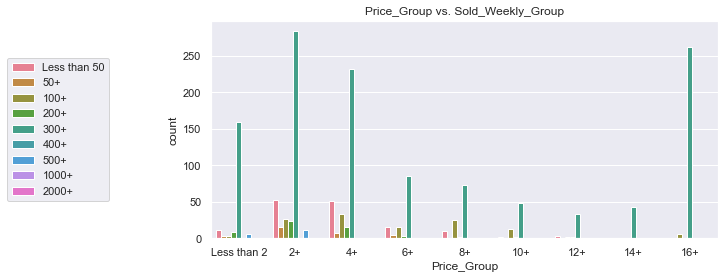

In [40]:
# price group vs sold weekly group

plt.rcParams['figure.figsize'] = (20, 4)

# compare the year with price group with sold weekly group
plt.subplot(121)
sns.countplot(x='Price_Group',hue= 'Sold_Weekly_Group', data=df, palette = 'husl')
plt.legend(bbox_to_anchor=(-0.2, 0.5), loc='right', borderaxespad=0)
plt.title('Price_Group vs. Sold_Weekly_Group')

In [41]:
df.to_csv(r'C:\Users\13750\Desktop\Empire Bazaar Group Corp\US chinese product market\SNACK MARKET\Analysis Data\dried fruit\dried fruit.csv', index = False)